<a href="https://colab.research.google.com/github/leann-z/CMSC691_Wearable_StressDetection/blob/main/DS_Project_Data_Cleaning_%2B_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from datetime import datetime
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import ast
from sklearn.impute import KNNImputer

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving wesad_full_features.csv to wesad_full_features (1).csv


In [ ]:
df = pd.read_csv('wesad_full_features.csv')
#print(df.head())
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804 entries, 0 to 1803
Columns: 131 entries, subject to HRV_MFDFA_alpha2_Increment
dtypes: float64(38), int64(1), object(92)
memory usage: 1.8+ MB
None
subject                           0
label                             0
ACC_0_mean                        0
ACC_0_std                         0
ACC_0_min                         0
                               ... 
HRV_MFDFA_alpha2_Max            170
HRV_MFDFA_alpha2_Delta          170
HRV_MFDFA_alpha2_Asymmetry      170
HRV_MFDFA_alpha2_Fluctuation    170
HRV_MFDFA_alpha2_Increment      170
Length: 131, dtype: int64


In [ ]:
def unwrap_value(val):
    try:
        parsed = ast.literal_eval(val) if isinstance(val, str) else val
        if isinstance(parsed, list) and parsed and isinstance(parsed[0], list):
            return parsed[0][0]
    except:
        pass
    return val


# Unwrap nested values
df = df.applymap(unwrap_value)

<ipython-input-6-1f3177e545c2>:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(unwrap_value)


In [ ]:
# Replace common null-like strings with NaN
df = df.replace(['[[nan]]', 'nan', 'NaN', 'None', None,''], np.nan)

# Replace inf/-inf with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna(axis=1, how='all')
df

<ipython-input-7-f6de2ad054ba>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(['[[nan]]', 'nan', 'NaN', 'None', None,''], np.nan)


,subject,label,ACC_0_mean,ACC_0_std,ACC_0_min,ACC_0_max,ACC_1_mean,ACC_1_std,ACC_1_min,ACC_1_max,...,Resp_0_max,HRV_DFA_alpha2,HRV_MFDFA_alpha2_Width,HRV_MFDFA_alpha2_Peak,HRV_MFDFA_alpha2_Mean,HRV_MFDFA_alpha2_Max,HRV_MFDFA_alpha2_Delta,HRV_MFDFA_alpha2_Asymmetry,HRV_MFDFA_alpha2_Fluctuation,HRV_MFDFA_alpha2_Increment
0,S10,0,0.884811,0.016381,0.7314,1.0622,0.057045,0.051970,-0.1954,0.2082,...,8.479309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,S10,1,0.884806,0.006702,0.8034,0.9912,0.082801,0.014365,-0.0792,0.1432,...,8.479309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,S10,1,0.871875,0.015573,0.7928,1.0168,0.064452,0.025789,-0.0792,0.1846,...,11.723328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,S10,1,0.861457,0.007759,0.7928,1.0168,0.045407,0.014106,-0.0702,0.1846,...,11.723328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,S10,1,0.862883,0.004415,0.8430,0.8794,0.044194,0.007487,0.0244,0.1018,...,4.554749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1799,S9,4,0.453183,0.021079,0.3768,0.4856,0.022638,0.005940,-0.0006,0.0478,...,6.028748,1.395548,3.464437,1.820796,3.127766,-4.429402,-5.478738,-0.122747,0.019689,1.346613
1800,S9,4,0.456412,0.013375,0.4020,0.4854,0.021659,0.005444,-0.0006,0.0442,...,6.028748,1.395548,3.464437,1.820796,3.127766,-4.429402,-5.478738,-0.122747,0.019689,1.346613
1801,S9,4,0.461492,0.010745,0.4170,0.4838,0.021980,0.004805,0.0026,0.0422,...,3.660583,1.395548,3.464437,1.820796,3.127766,-4.429402,-5.478738,-0.122747,0.019689,1.346613
1802,S9,4,0.506530,0.143295,0.3772,1.2442,0.012606,0.027129,-0.2136,0.1160,...,12.620544,1.395548,3.464437,1.820796,3.127766,-4.429402,-5.478738,-0.122747,0.019689,1.346613


In [ ]:
# Filter out rows with label in [0, 5, 6, 7]
if 'label' in df.columns:
    df = df[~df['label'].isin([0, 5, 6, 7])]
else:
    raise ValueError("No 'label' column found in the data.")

In [ ]:
df['HRV_SampEn'] = pd.to_numeric(df['HRV_SampEn'], errors='coerce')
df['label'] = df['label'].astype(int)

<ipython-input-9-e2b88a49811c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HRV_SampEn'] = pd.to_numeric(df['HRV_SampEn'], errors='coerce')
<ipython-input-9-e2b88a49811c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].astype(int)


In [ ]:
# Separate numeric and non-numeric columns
numeric_df = df.select_dtypes(include=[np.number])
categorical_df = df.select_dtypes(exclude=[np.number])
categorical_df

,subject
1,S10
2,S10
3,S10
4,S10
5,S10
...,...
1798,S9
1799,S9
1800,S9
1801,S9


In [ ]:
# Drop all-NaN or all-zero numeric columns
numeric_df = numeric_df.dropna(axis=1, how='all')
numeric_df = numeric_df.loc[:, (numeric_df != 0).any(axis=0)]
numeric_df

,label,ACC_0_mean,ACC_0_std,ACC_0_min,ACC_0_max,ACC_1_mean,ACC_1_std,ACC_1_min,ACC_1_max,ACC_2_mean,...,Resp_0_max,HRV_DFA_alpha2,HRV_MFDFA_alpha2_Width,HRV_MFDFA_alpha2_Peak,HRV_MFDFA_alpha2_Mean,HRV_MFDFA_alpha2_Max,HRV_MFDFA_alpha2_Delta,HRV_MFDFA_alpha2_Asymmetry,HRV_MFDFA_alpha2_Fluctuation,HRV_MFDFA_alpha2_Increment
1,1,0.884806,0.006702,0.8034,0.9912,0.082801,0.014365,-0.0792,0.1432,-0.205440,...,8.479309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.871875,0.015573,0.7928,1.0168,0.064452,0.025789,-0.0792,0.1846,-0.264077,...,11.723328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.861457,0.007759,0.7928,1.0168,0.045407,0.014106,-0.0702,0.1846,-0.315126,...,11.723328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0.862883,0.004415,0.8430,0.8794,0.044194,0.007487,0.0244,0.1018,-0.311683,...,4.554749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,0.860271,0.004233,0.8446,0.8770,0.046866,0.006534,0.0254,0.0842,-0.318932,...,4.191589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798,4,0.454308,0.021122,0.3768,0.5108,0.021735,0.006105,-0.0066,0.0478,-0.850370,...,5.198669,1.395548,3.464437,1.820796,3.127766,-4.429402,-5.478738,-0.122747,0.019689,1.346613
1799,4,0.453183,0.021079,0.3768,0.4856,0.022638,0.005940,-0.0006,0.0478,-0.850974,...,6.028748,1.395548,3.464437,1.820796,3.127766,-4.429402,-5.478738,-0.122747,0.019689,1.346613
1800,4,0.456412,0.013375,0.4020,0.4854,0.021659,0.005444,-0.0006,0.0442,-0.849246,...,6.028748,1.395548,3.464437,1.820796,3.127766,-4.429402,-5.478738,-0.122747,0.019689,1.346613
1801,4,0.461492,0.010745,0.4170,0.4838,0.021980,0.004805,0.0026,0.0422,-0.846005,...,3.660583,1.395548,3.464437,1.820796,3.127766,-4.429402,-5.478738,-0.122747,0.019689,1.346613


In [ ]:
# KNN Imputation only on numeric columns
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(numeric_df)
numeric_df_imputed = pd.DataFrame(imputed_data, columns=numeric_df.columns, index=numeric_df.index)
numeric_df_imputed['label'] = numeric_df_imputed['label'].astype(int)

In [ ]:
# Combine back numeric and non-numeric data
final_df = pd.concat([numeric_df_imputed, categorical_df], axis=1)
numeric_df_imputed

,label,ACC_0_mean,ACC_0_std,ACC_0_min,ACC_0_max,ACC_1_mean,ACC_1_std,ACC_1_min,ACC_1_max,ACC_2_mean,...,Resp_0_max,HRV_DFA_alpha2,HRV_MFDFA_alpha2_Width,HRV_MFDFA_alpha2_Peak,HRV_MFDFA_alpha2_Mean,HRV_MFDFA_alpha2_Max,HRV_MFDFA_alpha2_Delta,HRV_MFDFA_alpha2_Asymmetry,HRV_MFDFA_alpha2_Fluctuation,HRV_MFDFA_alpha2_Increment
1,1,0.884806,0.006702,0.8034,0.9912,0.082801,0.014365,-0.0792,0.1432,-0.205440,...,8.479309,1.437488,8.062992,2.325812,4.425127,-7.085001,-5.279455,-0.226363,0.112381,6.917158
2,1,0.871875,0.015573,0.7928,1.0168,0.064452,0.025789,-0.0792,0.1846,-0.264077,...,11.723328,1.320116,2.507890,1.247840,2.243984,-2.248581,-4.175798,-0.075847,0.013398,0.894420
3,1,0.861457,0.007759,0.7928,1.0168,0.045407,0.014106,-0.0702,0.1846,-0.315126,...,11.723328,1.618260,1.396548,1.703903,1.620262,2.405005,0.008189,-0.402199,0.004278,0.301738
4,1,0.862883,0.004415,0.8430,0.8794,0.044194,0.007487,0.0244,0.1018,-0.311683,...,4.554749,1.227827,2.661480,1.003188,1.497975,-0.580940,-1.937110,-0.263222,0.006604,0.857844
5,1,0.860271,0.004233,0.8446,0.8770,0.046866,0.006534,0.0254,0.0842,-0.318932,...,4.191589,1.573871,4.509361,2.255266,2.820078,-1.462411,-1.373402,-0.507220,0.040922,2.853560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798,4,0.454308,0.021122,0.3768,0.5108,0.021735,0.006105,-0.0066,0.0478,-0.850370,...,5.198669,1.395548,3.464437,1.820796,3.127766,-4.429402,-5.478738,-0.122747,0.019689,1.346613
1799,4,0.453183,0.021079,0.3768,0.4856,0.022638,0.005940,-0.0006,0.0478,-0.850974,...,6.028748,1.395548,3.464437,1.820796,3.127766,-4.429402,-5.478738,-0.122747,0.019689,1.346613
1800,4,0.456412,0.013375,0.4020,0.4854,0.021659,0.005444,-0.0006,0.0442,-0.849246,...,6.028748,1.395548,3.464437,1.820796,3.127766,-4.429402,-5.478738,-0.122747,0.019689,1.346613
1801,4,0.461492,0.010745,0.4170,0.4838,0.021980,0.004805,0.0026,0.0422,-0.846005,...,3.660583,1.395548,3.464437,1.820796,3.127766,-4.429402,-5.478738,-0.122747,0.019689,1.346613


In [ ]:
print(final_df.info())
print(final_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 1499 entries, 1 to 1802
Columns: 123 entries, label to subject
dtypes: float64(121), int64(1), object(1)
memory usage: 1.4+ MB
None
label                           0
ACC_0_mean                      0
ACC_0_std                       0
ACC_0_min                       0
ACC_0_max                       0
                               ..
HRV_MFDFA_alpha2_Delta          0
HRV_MFDFA_alpha2_Asymmetry      0
HRV_MFDFA_alpha2_Fluctuation    0
HRV_MFDFA_alpha2_Increment      0
subject                         0
Length: 123, dtype: int64


In [ ]:
final_df.head(50)

,label,ACC_0_mean,ACC_0_std,ACC_0_min,ACC_0_max,ACC_1_mean,ACC_1_std,ACC_1_min,ACC_1_max,ACC_2_mean,...,HRV_DFA_alpha2,HRV_MFDFA_alpha2_Width,HRV_MFDFA_alpha2_Peak,HRV_MFDFA_alpha2_Mean,HRV_MFDFA_alpha2_Max,HRV_MFDFA_alpha2_Delta,HRV_MFDFA_alpha2_Asymmetry,HRV_MFDFA_alpha2_Fluctuation,HRV_MFDFA_alpha2_Increment,subject
1,1,0.884806,0.006702,0.8034,0.9912,0.082801,0.014365,-0.0792,0.1432,-0.205440,...,1.437488,8.062992,2.325812,4.425127,-7.085001,-5.279455,-0.226363,0.112381,6.917158,S10
2,1,0.871875,0.015573,0.7928,1.0168,0.064452,0.025789,-0.0792,0.1846,-0.264077,...,1.320116,2.507890,1.247840,2.243984,-2.248581,-4.175798,-0.075847,0.013398,0.894420,S10
3,1,0.861457,0.007759,0.7928,1.0168,0.045407,0.014106,-0.0702,0.1846,-0.315126,...,1.618260,1.396548,1.703903,1.620262,2.405005,0.008189,-0.402199,0.004278,0.301738,S10
4,1,0.862883,0.004415,0.8430,0.8794,0.044194,0.007487,0.0244,0.1018,-0.311683,...,1.227827,2.661480,1.003188,1.497975,-0.580940,-1.937110,-0.263222,0.006604,0.857844,S10
5,1,0.860271,0.004233,0.8446,0.8770,0.046866,0.006534,0.0254,0.0842,-0.318932,...,1.573871,4.509361,2.255266,2.820078,-1.462411,-1.373402,-0.507220,0.040922,2.853560,S10
6,1,0.859880,0.011523,0.8070,1.0556,0.058961,0.021442,-0.1550,0.1208,-0.312813,...,1.188855,3.356983,0.868288,1.984184,-1.660793,-3.076742,-0.079544,0.042661,2.472913,S10
7,1,0.859519,0.011538,0.8070,1.0556,0.071603,0.019418,-0.1550,0.1208,-0.308608,...,1.200297,4.664155,1.226248,2.560016,-3.935175,-4.254449,-0.133969,0.043751,2.994050,S10
8,1,0.858526,0.004904,0.8330,0.9066,0.072106,0.006892,0.0374,0.1300,-0.313780,...,1.081701,2.964737,0.676465,1.627461,-2.360263,-3.741946,-0.087772,0.009436,1.032495,S10
9,1,0.857370,0.005340,0.8330,0.9066,0.072850,0.007179,0.0374,0.1300,-0.316919,...,1.655193,4.961079,2.630839,3.339112,-2.548291,-2.102027,-0.529570,0.043758,3.062373,S10
10,1,0.857216,0.009037,0.8106,1.0088,0.055339,0.031005,-0.1692,0.1386,-0.323762,...,1.390811,1.248086,1.001607,1.230714,1.711562,-1.068023,-0.204399,0.004275,0.267576,S10


<ipython-input-17-7613b5dc4f1b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=final_df,x='label',palette='magma')


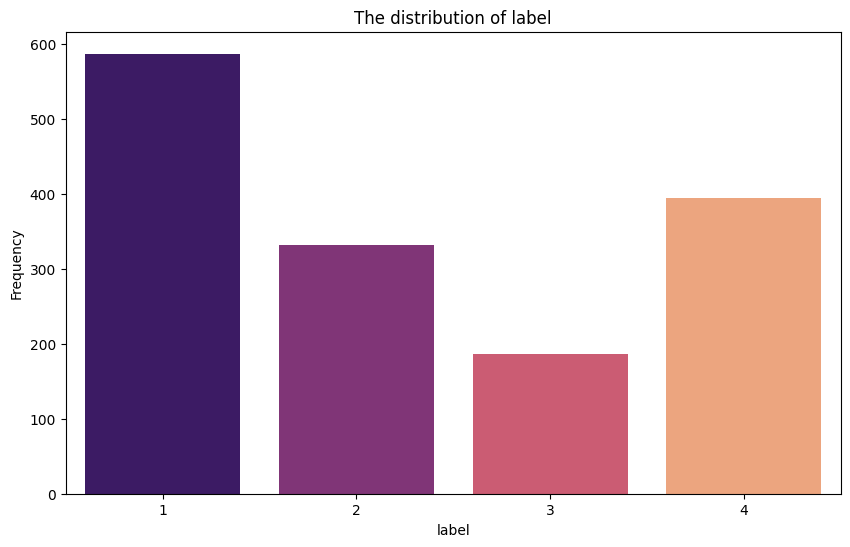

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=final_df,x='label',palette='magma')
plt.ylabel('Frequency')
plt.title('The distribution of label')
plt.show()

<ipython-input-18-d820eac79614>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label',y= 'ECG_Rate_Mean',data=final_df, palette='magma')


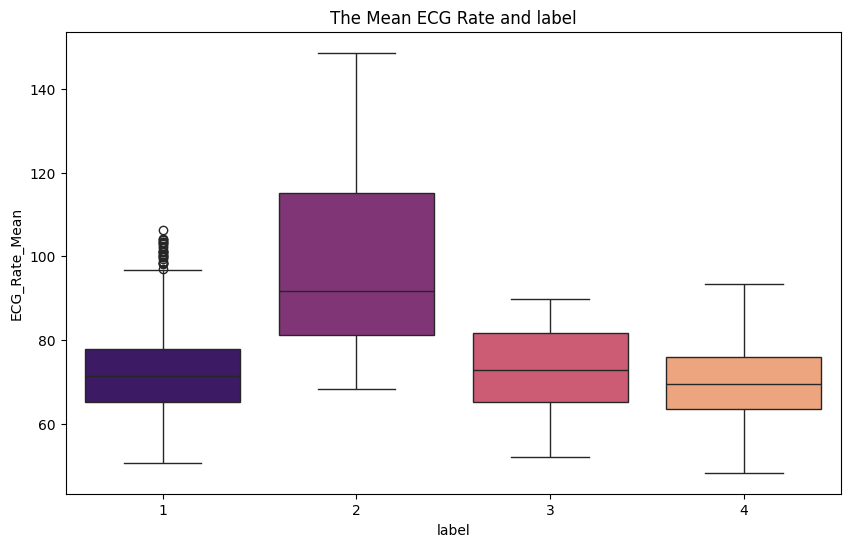

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='label',y= 'ECG_Rate_Mean',data=final_df, palette='magma')
plt.title('The Mean ECG Rate and label')
plt.show()

In [ ]:
# Create a palette that maps 1 to 11 to a gradient
levels = sorted(final_df['label'].dropna().unique())
palette = sns.color_palette("magma", len(levels))
label_palette = dict(zip(levels, palette))

# Plot
g = sns.pairplot(data=final_df, hue='label', palette=label_palette)
g.fig.suptitle('The Pairplot of Data', y=1.02)
plt.show()

In [ ]:
#1. Numerical-Numerical
corr_num = numeric_df_imputed.corr(method='pearson')  # or 'spearman', 'kendall'
numeric_df_imputed

,label,ACC_0_mean,ACC_0_std,ACC_0_min,ACC_0_max,ACC_1_mean,ACC_1_std,ACC_1_min,ACC_1_max,ACC_2_mean,...,Resp_0_max,HRV_DFA_alpha2,HRV_MFDFA_alpha2_Width,HRV_MFDFA_alpha2_Peak,HRV_MFDFA_alpha2_Mean,HRV_MFDFA_alpha2_Max,HRV_MFDFA_alpha2_Delta,HRV_MFDFA_alpha2_Asymmetry,HRV_MFDFA_alpha2_Fluctuation,HRV_MFDFA_alpha2_Increment
1,1,0.884806,0.006702,0.8034,0.9912,0.082801,0.014365,-0.0792,0.1432,-0.205440,...,8.479309,1.437488,8.062992,2.325812,4.425127,-7.085001,-5.279455,-0.226363,0.112381,6.917158
2,1,0.871875,0.015573,0.7928,1.0168,0.064452,0.025789,-0.0792,0.1846,-0.264077,...,11.723328,1.320116,2.507890,1.247840,2.243984,-2.248581,-4.175798,-0.075847,0.013398,0.894420
3,1,0.861457,0.007759,0.7928,1.0168,0.045407,0.014106,-0.0702,0.1846,-0.315126,...,11.723328,1.618260,1.396548,1.703903,1.620262,2.405005,0.008189,-0.402199,0.004278,0.301738
4,1,0.862883,0.004415,0.8430,0.8794,0.044194,0.007487,0.0244,0.1018,-0.311683,...,4.554749,1.227827,2.661480,1.003188,1.497975,-0.580940,-1.937110,-0.263222,0.006604,0.857844
5,1,0.860271,0.004233,0.8446,0.8770,0.046866,0.006534,0.0254,0.0842,-0.318932,...,4.191589,1.573871,4.509361,2.255266,2.820078,-1.462411,-1.373402,-0.507220,0.040922,2.853560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798,4,0.454308,0.021122,0.3768,0.5108,0.021735,0.006105,-0.0066,0.0478,-0.850370,...,5.198669,1.395548,3.464437,1.820796,3.127766,-4.429402,-5.478738,-0.122747,0.019689,1.346613
1799,4,0.453183,0.021079,0.3768,0.4856,0.022638,0.005940,-0.0006,0.0478,-0.850974,...,6.028748,1.395548,3.464437,1.820796,3.127766,-4.429402,-5.478738,-0.122747,0.019689,1.346613
1800,4,0.456412,0.013375,0.4020,0.4854,0.021659,0.005444,-0.0006,0.0442,-0.849246,...,6.028748,1.395548,3.464437,1.820796,3.127766,-4.429402,-5.478738,-0.122747,0.019689,1.346613
1801,4,0.461492,0.010745,0.4170,0.4838,0.021980,0.004805,0.0026,0.0422,-0.846005,...,3.660583,1.395548,3.464437,1.820796,3.127766,-4.429402,-5.478738,-0.122747,0.019689,1.346613


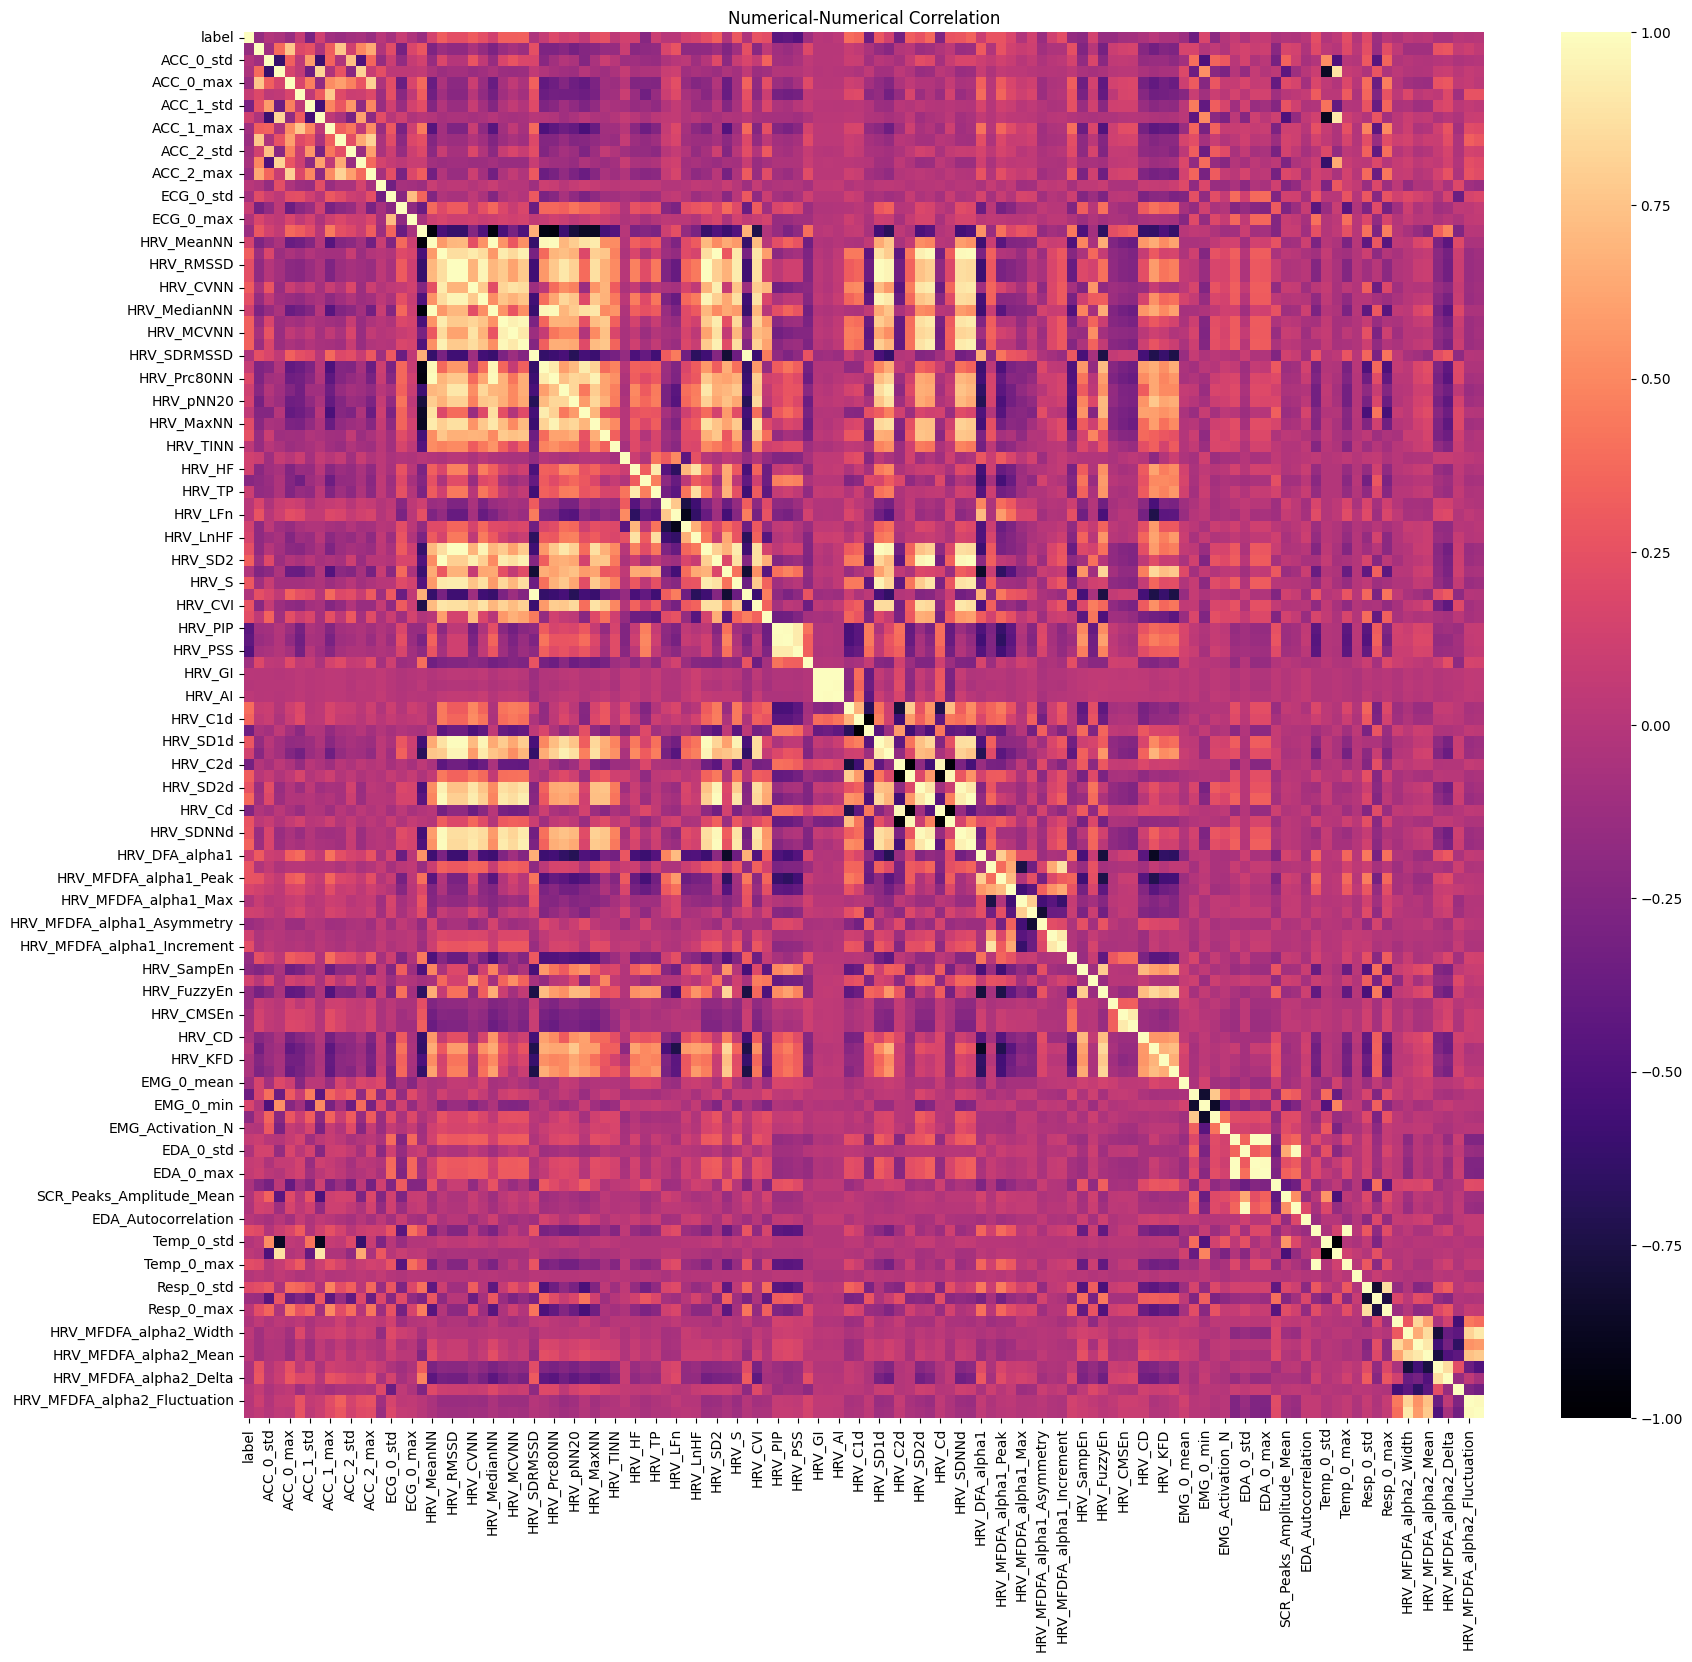

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 18))
sns.heatmap(corr_num.astype(float), annot=False, cmap='magma')
plt.title('Numerical-Numerical Correlation')
plt.show()

In [ ]:
# Flatten and sort
corr_pairs = corr_num.unstack().reset_index()
corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
corr_pairs = corr_pairs[corr_pairs['Feature 1'] != corr_pairs['Feature 2']]
top_corr = corr_pairs.reindex(corr_pairs['Correlation'].abs().sort_values(ascending=False).index).drop_duplicates()

print(top_corr.head(1000))



              Feature 1  Feature 2  Correlation
7381            HRV_C1d    HRV_C1a    -1.000000
7502            HRV_C1a    HRV_C1d    -1.000000
7994            HRV_C2a    HRV_C2d    -1.000000
7873            HRV_C2d    HRV_C2a    -1.000000
2607           HRV_SDSD    HRV_SD1     1.000000
...                 ...        ...          ...
6241   HRV_CSI_Modified   HRV_SDNN     0.590693
11135           HRV_LZC  HRV_MinNN     0.590534
4117          HRV_MinNN    HRV_LZC     0.590534
8206           HRV_SD2a  HRV_pNN20     0.589768
3971          HRV_pNN20   HRV_SD2a     0.589768

[1000 rows x 3 columns]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming you have a target column named 'target'
X = numeric_df_imputed.drop(columns=['label'])  # Features
y = numeric_df_imputed['label']  # Target

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
print(feature_importance_df)


                   feature  importance
92               EMG_0_std    0.061367
94               EMG_0_max    0.030622
28             HRV_Prc20NN    0.029062
5                ACC_1_std    0.028006
32               HRV_MinNN    0.025918
..                     ...         ...
86              HRV_RCMSEn    0.001791
55                  HRV_GI    0.001723
103    EDA_Autocorrelation    0.001607
74   HRV_MFDFA_alpha1_Mean    0.001580
95        EMG_Activation_N    0.000862

[121 rows x 2 columns]


In [ ]:
# Calculate the correlation matrix
corr_matrix = X.corr()

# Get pairs of highly correlated features
threshold = 0.9
high_corr = [(col1, col2) for col1 in corr_matrix.columns for col2 in corr_matrix.columns
             if abs(corr_matrix.loc[col1, col2]) > threshold and col1 != col2]

print(high_corr)

[('ACC_1_min', 'Temp_0_min'), ('ECG_Rate_Mean', 'HRV_MeanNN'), ('ECG_Rate_Mean', 'HRV_MedianNN'), ('ECG_Rate_Mean', 'HRV_Prc20NN'), ('ECG_Rate_Mean', 'HRV_Prc80NN'), ('HRV_MeanNN', 'ECG_Rate_Mean'), ('HRV_MeanNN', 'HRV_MedianNN'), ('HRV_MeanNN', 'HRV_Prc20NN'), ('HRV_MeanNN', 'HRV_Prc80NN'), ('HRV_MeanNN', 'HRV_MaxNN'), ('HRV_SDNN', 'HRV_CVNN'), ('HRV_SDNN', 'HRV_MadNN'), ('HRV_SDNN', 'HRV_IQRNN'), ('HRV_SDNN', 'HRV_SD2'), ('HRV_SDNN', 'HRV_S'), ('HRV_SDNN', 'HRV_SD2d'), ('HRV_SDNN', 'HRV_SD2a'), ('HRV_SDNN', 'HRV_SDNNd'), ('HRV_SDNN', 'HRV_SDNNa'), ('HRV_RMSSD', 'HRV_SDSD'), ('HRV_RMSSD', 'HRV_CVSD'), ('HRV_RMSSD', 'HRV_pNN50'), ('HRV_RMSSD', 'HRV_SD1'), ('HRV_RMSSD', 'HRV_S'), ('HRV_RMSSD', 'HRV_SD1d'), ('HRV_RMSSD', 'HRV_SD1a'), ('HRV_SDSD', 'HRV_RMSSD'), ('HRV_SDSD', 'HRV_CVSD'), ('HRV_SDSD', 'HRV_pNN50'), ('HRV_SDSD', 'HRV_SD1'), ('HRV_SDSD', 'HRV_S'), ('HRV_SDSD', 'HRV_SD1d'), ('HRV_SDSD', 'HRV_SD1a'), ('HRV_CVNN', 'HRV_SDNN'), ('HRV_CVNN', 'HRV_SD2'), ('HRV_CVNN', 'HRV_SD2a'), (

In [ ]:
# Make a copy of the feature importance DataFrame for easy lookup
importance_map = dict(zip(feature_importance_df['feature'], feature_importance_df['importance']))

# Track already dropped columns to avoid double removal
dropped_columns = set()

# Loop through correlated pairs
for col1, col2 in high_corr:
    # Skip if either column has already been dropped
    if col1 in dropped_columns or col2 in dropped_columns:
        continue

    # Skip if either column no longer exists
    if col1 not in X.columns or col2 not in X.columns:
        continue

    # Get feature importance values (default to 0 if missing)
    imp1 = importance_map.get(col1, 0)
    imp2 = importance_map.get(col2, 0)

    # Drop the less important feature
    if imp1 < imp2:
        X = X.drop(columns=[col1])
        dropped_columns.add(col1)
    else:
        X = X.drop(columns=[col2])
        dropped_columns.add(col2)


print(f"Remaining columns after removal: {X.columns.tolist()}")
X

Remaining columns after removal: ['ACC_0_mean', 'ACC_0_std', 'ACC_0_min', 'ACC_0_max', 'ACC_1_mean', 'ACC_1_std', 'ACC_1_min', 'ACC_1_max', 'ACC_2_mean', 'ACC_2_std', 'ACC_2_min', 'ACC_2_max', 'ECG_0_mean', 'ECG_0_std', 'ECG_0_min', 'ECG_0_max', 'HRV_CVNN', 'HRV_MCVNN', 'HRV_Prc20NN', 'HRV_pNN20', 'HRV_MaxNN', 'HRV_HTI', 'HRV_TINN', 'HRV_LF', 'HRV_HF', 'HRV_VHF', 'HRV_LFHF', 'HRV_HFn', 'HRV_LnHF', 'HRV_SD1SD2', 'HRV_S', 'HRV_CSI', 'HRV_CSI_Modified', 'HRV_PIP', 'HRV_PAS', 'HRV_SI', 'HRV_PI', 'HRV_C1a', 'HRV_SD1a', 'HRV_C2a', 'HRV_SDNNd', 'HRV_DFA_alpha1', 'HRV_MFDFA_alpha1_Width', 'HRV_MFDFA_alpha1_Peak', 'HRV_MFDFA_alpha1_Mean', 'HRV_MFDFA_alpha1_Max', 'HRV_MFDFA_alpha1_Delta', 'HRV_MFDFA_alpha1_Asymmetry', 'HRV_MFDFA_alpha1_Increment', 'HRV_ApEn', 'HRV_SampEn', 'HRV_ShanEn', 'HRV_FuzzyEn', 'HRV_MSEn', 'HRV_CMSEn', 'HRV_CD', 'HRV_HFD', 'HRV_KFD', 'HRV_LZC', 'EMG_0_mean', 'EMG_0_std', 'EMG_0_min', 'EMG_0_max', 'EMG_Activation_N', 'EDA_0_std', 'EDA_0_max', 'SCR_Peaks_N', 'SCR_Peaks_Ampl

,ACC_0_mean,ACC_0_std,ACC_0_min,ACC_0_max,ACC_1_mean,ACC_1_std,ACC_1_min,ACC_1_max,ACC_2_mean,ACC_2_std,...,Resp_0_mean,Resp_0_std,Resp_0_min,Resp_0_max,HRV_DFA_alpha2,HRV_MFDFA_alpha2_Peak,HRV_MFDFA_alpha2_Max,HRV_MFDFA_alpha2_Delta,HRV_MFDFA_alpha2_Asymmetry,HRV_MFDFA_alpha2_Fluctuation
1,0.884806,0.006702,0.8034,0.9912,0.082801,0.014365,-0.0792,0.1432,-0.205440,0.013360,...,-0.048631,3.203791,-8.285522,8.479309,1.437488,2.325812,-7.085001,-5.279455,-0.226363,0.112381
2,0.871875,0.015573,0.7928,1.0168,0.064452,0.025789,-0.0792,0.1846,-0.264077,0.059623,...,0.002573,3.421302,-12.843323,11.723328,1.320116,1.247840,-2.248581,-4.175798,-0.075847,0.013398
3,0.861457,0.007759,0.7928,1.0168,0.045407,0.014106,-0.0702,0.1846,-0.315126,0.017693,...,0.077553,3.250835,-12.843323,11.723328,1.618260,1.703903,2.405005,0.008189,-0.402199,0.004278
4,0.862883,0.004415,0.8430,0.8794,0.044194,0.007487,0.0244,0.1018,-0.311683,0.011957,...,0.103903,1.961128,-3.910828,4.554749,1.227827,1.003188,-0.580940,-1.937110,-0.263222,0.006604
5,0.860271,0.004233,0.8446,0.8770,0.046866,0.006534,0.0254,0.0842,-0.318932,0.011402,...,0.065258,1.904876,-3.910828,4.191589,1.573871,2.255266,-1.462411,-1.373402,-0.507220,0.040922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798,0.454308,0.021122,0.3768,0.5108,0.021735,0.006105,-0.0066,0.0478,-0.850370,0.015742,...,0.008871,2.666291,-6.649780,5.198669,1.395548,1.820796,-4.429402,-5.478738,-0.122747,0.019689
1799,0.453183,0.021079,0.3768,0.4856,0.022638,0.005940,-0.0006,0.0478,-0.850974,0.015723,...,0.071736,3.048759,-6.649780,6.028748,1.395548,1.820796,-4.429402,-5.478738,-0.122747,0.019689
1800,0.456412,0.013375,0.4020,0.4854,0.021659,0.005444,-0.0006,0.0442,-0.849246,0.011830,...,0.129890,2.362941,-6.341553,6.028748,1.395548,1.820796,-4.429402,-5.478738,-0.122747,0.019689
1801,0.461492,0.010745,0.4170,0.4838,0.021980,0.004805,0.0026,0.0422,-0.846005,0.010426,...,-0.000630,1.572313,-4.570007,3.660583,1.395548,1.820796,-4.429402,-5.478738,-0.122747,0.019689


In [ ]:
# Re-train model with reduced feature set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Check model performance on test data
print(f"Test accuracy: {model.score(X_test, y_test):.4f}")


Test accuracy: 0.9267


In [ ]:
save_df = pd.concat([categorical_df,X, y], axis=1)

save_df.to_csv('final_data.csv', index=False)
files.download('final_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>